# PyBer

### Dependencies and data

In [1]:
# Dependencies
import os
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Plot settings
mpl.style.use('fivethirtyeight')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (12, 4)
mpl.rcParams['savefig.bbox'] = 'tight'

In [3]:
# City data
city_path = os.path.join('data', 'city_data.csv') # city data path
city_df = pd.read_csv(city_path)
city_df.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [4]:
# Ride data
ride_path = os.path.join('data', 'ride_data.csv') # ride data path
ride_df = pd.read_csv(ride_path, parse_dates=['date'])
ride_df.head(3)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003


### Merge data

In [5]:
# Check for missing vals in both dfs
print(city_df.isnull().sum())
ride_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64


city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# Check unique vals for each col
print(city_df.nunique())
ride_df.nunique()

city            120
driver_count     52
type              3
dtype: int64


city        120
date       2375
fare       1841
ride_id    2375
dtype: int64

In [7]:
# Merge data
df = pd.merge(ride_df, city_df, on='city', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


### Ride fare bubble chart with Pandas

In [8]:
# Aggregate data by by city
df_by_city = df.groupby(['city', 'type'], as_index=False) \
               .agg({'ride_id': 'count', 'fare': 'mean', 'driver_count': 'max'}) \
               .sort_values('ride_id')
df_by_city.columns = ['City', 'City Type', 'Total Rides', 'Average Fare ($)', 'Total Drivers']
df_by_city['Total Drivers x5'] = df_by_city['Total Drivers'] * 5

# Assign a color to each city type
type_colors = {'Rural': 'lightcoral', 'Suburban': 'limegreen', 'Urban': 'skyblue'}
df_by_city['Color'] = df_by_city['City Type'].map(type_colors)
df_by_city.head(3)

,City,City Type,Total Rides,Average Fare ($),Total Drivers,Total Drivers x5,Color
17,Garzaport,Rural,3,24.123333,7,35,lightcoral
98,South Saramouth,Rural,4,36.160000,7,35,lightcoral
57,Newtonview,Rural,4,36.745000,1,5,lightcoral


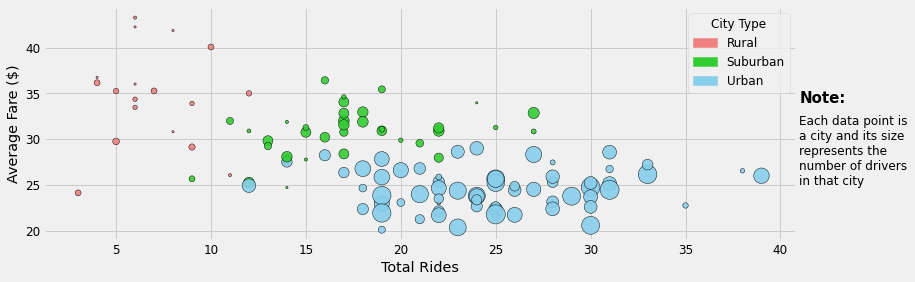

In [9]:
# Bubble chart
bubble_pd = df_by_city.plot(x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', c='Color',
                            edgecolor='black', alpha=0.9, kind='scatter')
plt.legend(title='City Type',
           handles=[mpl.patches.Patch(color=col, label=lab) for lab, col in type_colors.items()])

# Annotation
fontdict = dict(size=15, weight='bold')
plt.text(41, 34, 'Note:', fontdict=fontdict)
plt.text(41, 25, (
    'Each data point is\n'
    'a city and its size\n'
    'represents the\n'
    'number of drivers\n'
    'in that city'))

plt.show()

In [10]:
# Save bubble plot
bubble_pd.get_figure().savefig('analysis/pd_bubble.png')

### Ride fare bubble chart with Matplotlib

In [11]:
# Split data by city type
rural_df = df_by_city[df_by_city['City Type'] == 'Rural'].copy()
suburban_df = df_by_city[df_by_city['City Type'] == 'Suburban'].copy()
urban_df = df_by_city[df_by_city['City Type'] == 'Urban'].copy()

# Create a dict for the split data
type_dfs = {
    'Rural': rural_df,
    'Suburban': suburban_df,
    'Urban': urban_df
}
[(ctype, frame.shape) for ctype, frame in type_dfs.items()]

[('Rural', (18, 7)), ('Suburban', (36, 7)), ('Urban', (66, 7))]

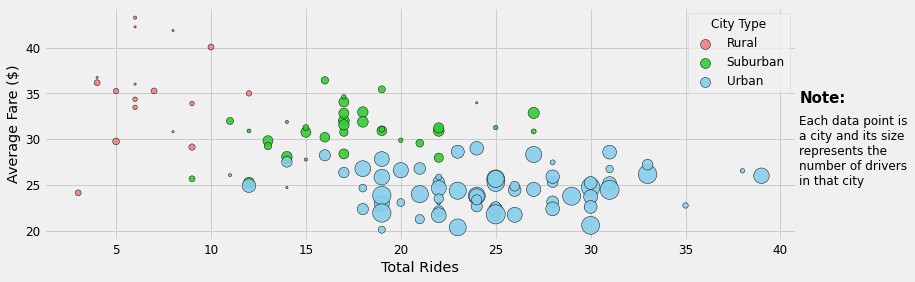

In [12]:
# Bubble chart
bubble_plt = plt.figure()
for ctype, frame in type_dfs.items():
    plt.scatter(data=frame, x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', 
                c=frame['Color'].mode(), edgecolor='black', alpha=0.9, label=ctype)

# Annotation
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Rides')
plt.text(41, 34, 'Note:', fontdict=fontdict)
plt.text(41, 25, (
    'Each data point is\n'
    'a city and its size\n'
    'represents the\n'
    'number of drivers\n'
    'in that city'))

# Legend
lgnd = plt.legend(title='City Type', mode='Expanded', scatterpoints=1)
lgnd.get_title().set_fontsize(12)
for i in range(3):
    lgnd.legendHandles[i]._sizes = [100]
plt.show()

In [13]:
bubble_plt.savefig('analysis/plt_bubble.png')

### City type box plots

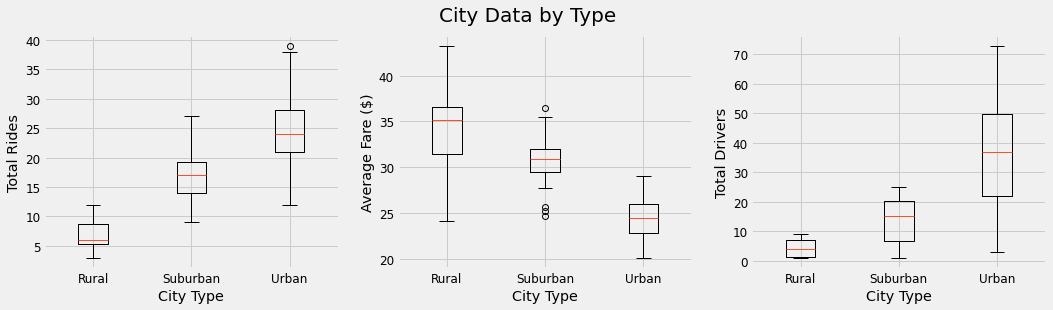

In [14]:
# Cols to plot
box_cols = ['Total Rides', 'Average Fare ($)', 'Total Drivers']

# Box plots
box, ax = plt.subplots(1, 3, figsize=(16, 4))
box.suptitle('City Data by Type', fontsize=20)
for i in range(3):
    ax[i].boxplot([frame[box_cols[i]] for frame in type_dfs.values()], labels=list(type_dfs.keys()))
    ax[i].set_ylabel(box_cols[i])
    ax[i].set_xlabel('City Type')
plt.show()

In [15]:
box.savefig('analysis/boxes.png')

### City type pie charts

In [16]:
# Aggregate data by city type
df_by_type = df.groupby('type').agg({'ride_id': 'count', 'fare': 'sum'})
df_by_type['Total Drivers'] = city_df.groupby('type')['driver_count'].sum()

# Formatting
df_by_type.reset_index(inplace=True)
df_by_type.columns = ['City Type', 'Total Rides', 'Total Fare ($)', 'Total Drivers']
df_by_type['Color'] = df_by_type['City Type'].map(type_colors)
df_by_type

,City Type,Total Rides,Total Fare ($),Total Drivers,Color
0,Rural,125,4327.93,78,lightcoral
1,Suburban,625,19356.33,490,limegreen
2,Urban,1625,39854.38,2405,skyblue


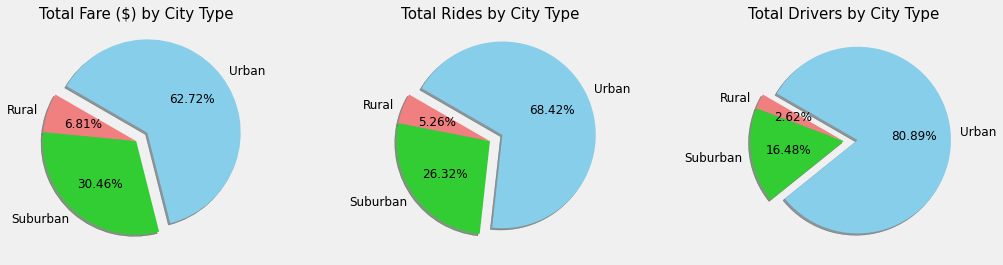

In [17]:
# Cols to plot
pie_cols = ['Total Fare ($)', 'Total Rides', 'Total Drivers']

# Pie charts
pie, ax = plt.subplots(1, 3, figsize=(16, 4))
for i in range(3):
    ax[i].pie(x=df_by_type[pie_cols[i]], 
              labels=df_by_type['City Type'].str.replace('($)', '', regex=False), 
              colors=df_by_type['Color'], autopct='%.2f%%', startangle=150, 
              explode=[0, 0, 0.15], shadow=True)
    ax[i].set_title(pie_cols[i] + ' by City Type', fontsize=15)
plt.show()

In [18]:
pie.savefig('analysis/pies.png')

### City type summary

In [19]:
# Set city type as index
df_by_type.set_index('City Type', inplace=True)
df_by_type

,Total Rides,Total Fare ($),Total Drivers,Color
City Type,,,,
Rural,125,4327.93,78,lightcoral
Suburban,625,19356.33,490,limegreen
Urban,1625,39854.38,2405,skyblue


In [20]:
# Add city count to type summary
df_by_type['Total Cities'] = df_by_city.groupby('City Type')['City'].count()

# Calculate averages for each type
df_by_type['Average Fare Per Ride ($)'] = df_by_type['Total Fare ($)'] / df_by_type['Total Rides']
df_by_type['Average Fare Per Driver ($)'] = df_by_type['Total Fare ($)'] / df_by_type['Total Drivers']
df_by_type['Average Rides (per city)'] = df_by_type['Total Rides'] / df_by_type['Total Cities']
df_by_type['Average Drivers (per city)'] = df_by_type['Total Drivers'] / df_by_type['Total Cities']
df_by_type

,Total Rides,Total Fare ($),Total Drivers,Color,Total Cities,Average Fare Per Ride ($),Average Fare Per Driver ($),Average Rides (per city),Average Drivers (per city)
City Type,,,,,,,,,
Rural,125,4327.93,78,lightcoral,18,34.623440,55.486282,6.944444,4.333333
Suburban,625,19356.33,490,limegreen,36,30.970128,39.502714,17.361111,13.611111
Urban,1625,39854.38,2405,skyblue,66,24.525772,16.571468,24.621212,36.439394


In [21]:
# Order columns
type_summ_cols = ['Total Cities', 'Total Fare ($)', 'Total Rides', 'Total Drivers', 
                  'Average Fare Per Ride ($)', 'Average Fare Per Driver ($)', 
                  'Average Rides (per city)', 'Average Drivers (per city)']
df_by_type = df_by_type[type_summ_cols].copy()

# Format summary
for col in df_by_type.columns:
    if 'per city' in col:
        df_by_type[col] = df_by_type[col].round(0).astype(int)
    elif '$' in col:
        df_by_type[col] = df_by_type[col].map('{:,.2f}'.format)
    else:
        df_by_type[col] = df_by_type[col].map('{:,}'.format)
        
df_by_type

,Total Cities,Total Fare ($),Total Rides,Total Drivers,Average Fare Per Ride ($),Average Fare Per Driver ($),Average Rides (per city),Average Drivers (per city)
City Type,,,,,,,,
Rural,18,"4,327.93",125,78,34.62,55.49,7,4
Suburban,36,"19,356.33",625,490,30.97,39.50,17,14
Urban,66,"39,854.38","1,625","2,405",24.53,16.57,25,36


### Weekly total fares by city type

In [22]:
# Fare time series for each city type
weekly_fares = df.pivot(index='date', columns='type', values='fare').fillna(0)
weekly_fares.head(3)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00


In [23]:
# Downsample to weekly frequency
weekly_fares = weekly_fares.resample('w').sum().iloc[:-1] # drop last week since it only has 2 days
weekly_fares.index.name = weekly_fares.columns.name = None
weekly_fares

,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


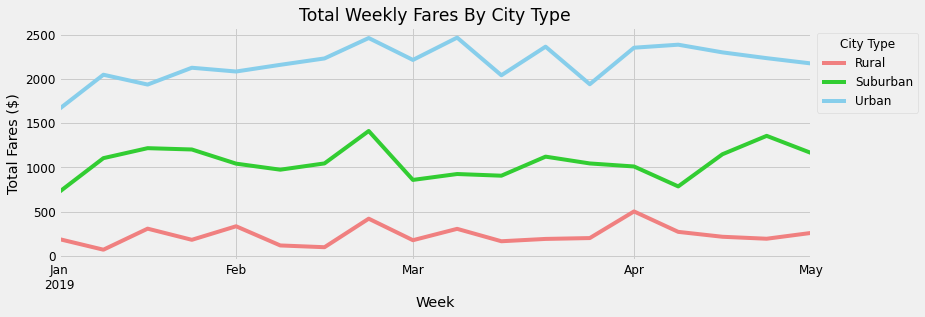

In [24]:
# Line plots
line = weekly_fares.plot(color=type_colors.values(), ylabel='Total Fares ($)', xlabel='Week',
                         title='Total Weekly Fares By City Type')
plt.legend(title='City Type', bbox_to_anchor=(1, 1))
plt.show()

In [25]:
line.get_figure().savefig('analysis/lines.png')